In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                        

# reading training data

In [4]:
dfx=pd.read_csv('Train.csv')
x1=dfx['feature_1'].values
x2=dfx['feature_2'].values
x3=dfx['feature_3'].values
x4=dfx['feature_4'].values
x5=dfx['feature_5'].values
y=dfx['target'].values
y=y.reshape((y.shape[0],1))

# gradient descent algorithm

In [5]:
def hypothesis(x1,x2,x3,x4,x5,theta):
    hx=theta[0]*x1+theta[1]*x2+theta[2]*x3+theta[3]*x4+theta[4]*x5+theta[5]
    return(hx)

In [6]:
def error(x1,x2,x3,x4,x5,y,theta):
    err=0
    for i in range(x1.shape[0]):
        hx=hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        err+=(hx-y[i][0])**2
    return(err)    
    

In [7]:
def gradient(x1,x2,x3,x4,x5,y,theta):
    grad=np.zeros((6))
    for i in range(x1.shape[0]):
        hx=hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        grad[0]+=(hx-y[i])*x1[i]
        grad[1]+=(hx-y[i])*x2[i]
        grad[2]+=(hx-y[i])*x3[i]
        grad[3]+=(hx-y[i])*x4[i]
        grad[4]+=(hx-y[i])*x5[i]
        grad[5]+=(hx-y[i])
    return(grad)

    

In [8]:
def gradient_descent(x1,x2,x3,x4,x5,y,learning_rate=0.0001):
    theta=np.array([2.0,0.3,8.2,1.0,0.5,6.0])
    error_list=[]
    for i in range(300):
        grad=gradient(x1,x2,x3,x4,x5,y,theta)
        err=error(x1,x2,x3,x4,x5,y,theta)
        error_list.append(err)
        theta[0]-=learning_rate*grad[0]
        theta[1]-=learning_rate*grad[1]
        theta[2]-=learning_rate*grad[2]
        theta[3]-=learning_rate*grad[3]
        theta[4]-=learning_rate*grad[4]
        theta[5]-=learning_rate*grad[5]
    return(theta,error_list)   

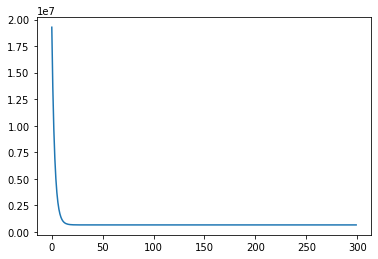

In [9]:
final_theta,error_list=gradient_descent(x1,x2,x3,x4,x5,y)
plt.plot(error_list)
plt.show()

In [10]:
print(final_theta)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121  4.99096674]


In [43]:
a=pd.read_csv('./Test.csv')
a1=a['feature_1'].values
a2=a['feature_2'].values
a3=a['feature_3'].values
a4=a['feature_4'].values
a5=a['feature_5'].values
b=hypothesis(a1,a2,a3,a4,a5,final_theta)
b=b.flatten()
a['predicted output']=b;
print('predicted air quality index is\n',a)

predicted air quality index is
      feature_1  feature_2  feature_3  feature_4  feature_5  predicted output
0     1.015254   2.076209  -0.266435  -2.418088  -0.980503        114.583689
1    -0.375021   0.953185   0.626719   0.704406  -0.355489        118.012815
2    -1.024452   0.962991  -0.407942  -1.861274   0.455201        -21.739852
3    -2.489841   0.544802   0.601219  -0.607021  -1.314286        -43.936899
4    -0.384675  -0.833624   1.358552  -0.547932   0.411925        -95.914898
..         ...        ...        ...        ...        ...               ...
395  -0.436959  -0.575844  -1.620908  -0.222588   1.086013        -81.989000
396  -0.421324  -2.417543   0.876275   0.844565   0.171646       -186.032535
397   0.554728   1.768243  -0.897787  -1.193661   0.340563        125.292336
398  -1.627172   0.856471  -0.000566   0.629387   0.453382         65.369841
399   0.139310   0.531597  -0.853107   0.031692   1.714893         57.059691

[400 rows x 6 columns]
